<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/CALL_Ago_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Implementation of Black-Scholes formula in Python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Parâmetros
S = np.linspace(25, 45, 100)  # Variação do preço do ativo
Kp = 36  # Preço de exercício
r = 0.10  # Taxa de juros livre de risco
σ = 0.25  # Volatilidade
sigma = σ

S1 = 38.5  # Preço atual do ativo subjacente
t = 252    # Tempo do ano em dias
T = (40/t)  # Tempo até o vencimento em dias

In [3]:
# Função para calcular o preço de uma opção de compra (call) usando o modelo Black-Scholes
def black_scholes_call(S, Kp, T, r, sigma):
    d1 = (np.log(S / Kp) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - Kp * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Função para calcular o preço de uma opção de venda (put) usando o modelo Black-Scholes
def black_scholes_put(S, Kp, T, r, sigma):
    d1 = (np.log(S / Kp) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = Kp * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Função para calcular o preço da opção baseado no tipo (call ou put)
def black_scholes_option(S, Kp, T, r, sigma, option_type='call'):
    if option_type == 'call':
        return black_scholes_call(S, Kp, T, r, sigma)
    elif option_type == 'put':
        return black_scholes_put(S, Kp, T, r, sigma)
    else:
        raise ValueError("option_type deve ser 'call' ou 'put'")

In [4]:
S1 = 38  # Preço atual do ativo subjacente
option_type = 'call'  # Tipo da opção ('call' ou 'put')

prices = black_scholes_option(S, Kp, T, r, sigma, option_type)

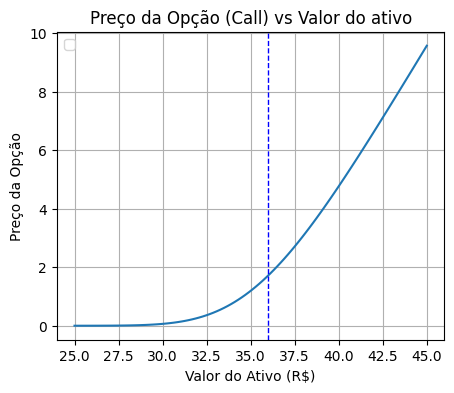

In [5]:
# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S, prices)
plt.axvline(x=Kp,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.xlabel('Valor do Ativo (R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

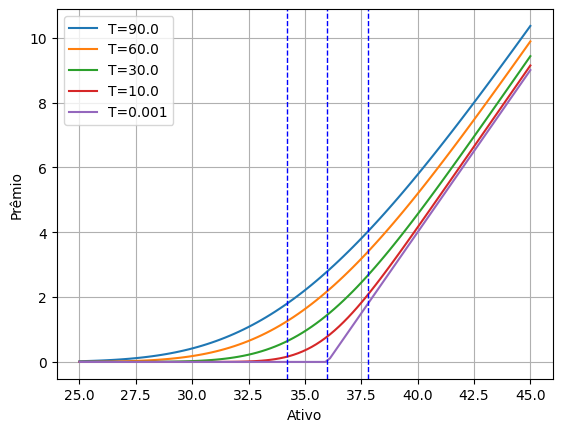

<Figure size 500x400 with 0 Axes>

In [6]:
# Solução de BS para diferentes prazos
for Ti in [90/252,60/252,30.0/252,10/252,0.001/252]:
  y = black_scholes_option(S, Kp, Ti, r, sigma, option_type)
  plt.plot(S,y,label=r'T='+str(Ti*252))

plt.axvline(x=Kp,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=Kp*(1+0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=Kp*(1-0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

CALL Comprada

In [21]:
# Plot do gráfico da PETR4 (Stk =38.17 / DTE= 45 - 18_10 / Comprado / P= 2.3 / SPT = 38.5 / 19_08)
# Parâmetros
S = np.linspace(30, 50, 100)  # Variação do preço do ativo
Kcc = 38.17  # Preço de exercício
r = 0.105  # Taxa de juros livre de risco
σ = 0.271  # Volatilidade
sigma = σ
S1 = 38.5  # Preço atual do ativo subjacente
t = 252    # Tempo do ano em dias
Tc = (45/t)  # Tempo até o vencimento em dias
option_type = 'call'  # Tipo da opção ('call' ou 'put')

In [23]:
Pcc = black_scholes_option(S1, Kcc, Tc, r, sigma, option_type)

CALL_comprada = black_scholes_option(S, Kcc, Tc, r, sigma, option_type)-Ppc
print(f"Preço da opção de {option_type}:{(Pcc):.2f}")

Preço da opção de call:2.30


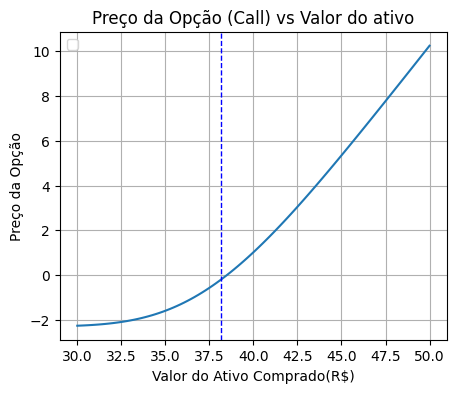

In [24]:
# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S, CALL_comprada)
plt.axvline(x=Kpc,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.xlabel('Valor do Ativo Comprado(R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

CALL Vendida

In [50]:
# Plot do gráfico da PETR4 (Stk =39.17 / DTE= 25 - 20_09 / Vendido / P= 0.9 / SPT = 38.5 / 19_08)
# Parâmetros
S = np.linspace(30, 50, 100)  # Variação do preço do ativo
Kcv = 39.17  # Preço de exercício
r = 0.105  # Taxa de juros livre de risco
σ = 0.212  # Volatilidade
sigma = σ
S1 = 38.5  # Preço atual do ativo subjacente
t = 252    # Tempo do ano em dias
Tv = (25/t)  # Tempo até o vencimento em dias
option_type = 'call'  # Tipo da opção ('call' ou 'put')

In [58]:
Pcv = black_scholes_option(S1, Kcv, Tv, r, sigma, option_type)

Tf = 0.00001
CALL_vendida = Pcv - black_scholes_option(S, Kcv, Tf, r, sigma, option_type)
print(f"Preço da opção de {option_type}:{(Pcv):.2f}")

Preço da opção de call:0.90


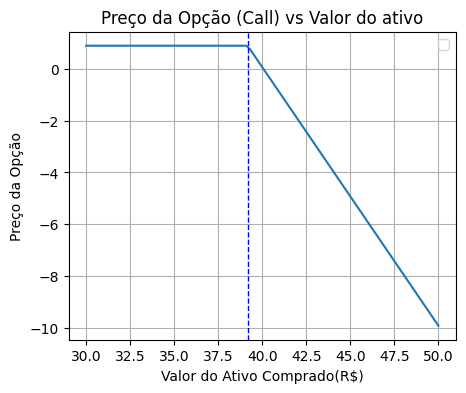

In [59]:
# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S, CALL_vendida)
plt.axvline(x=Kcv,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.xlabel('Valor do Ativo Comprado(R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
Estrategia =  CALL_comprada + CALL_vendida

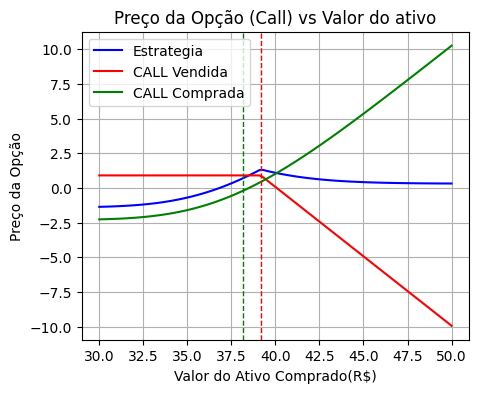

In [61]:
# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S, Estrategia, label='Estrategia', color='b')
plt.plot(S, CALL_vendida, label='CALL Vendida', color='r')
plt.plot(S, CALL_comprada, label='CALL Comprada', color='g')
plt.axvline(x=Kcc,ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kcv,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.xlabel('Valor do Ativo Comprado(R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

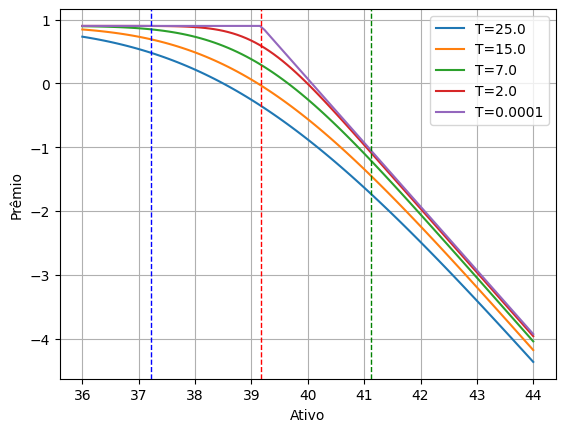

<Figure size 500x400 with 0 Axes>

In [62]:
S = np.linspace(36, 44, 100)  # Variação do preço do ativo

# Solução de BS para diferentes prazos
for Ti in [25/252,15/252,7/252,2/252,0.0001/252]:
  PUT_vendida1 = Pcv - black_scholes_option(S, Kcv, Ti, r, sigma, option_type)
  plt.plot(S,PUT_vendida1,label=r'T='+str(Ti*252))

plt.axvline(x=Kcv,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.axvline(x=Kcv*(1+0.05),ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kcv*(1-0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

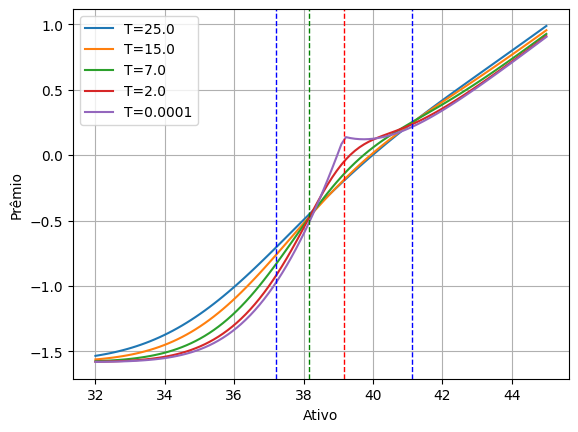

<Figure size 500x400 with 0 Axes>

In [63]:
S = np.linspace(32, 45, 100)  # Variação do preço do ativo
Peso = 0.8

# Solução de BS para diferentes prazos
for Ti in [25/252,15/252,7/252,2/252,0.0001/252]:
  PUT_vendida = (Pcv - black_scholes_option(S, Kcv, Ti, r, sigma, option_type))*Peso
  PUT_comprada = black_scholes_option(S, Kcc, Ti+(20/252), r, sigma, option_type)-Pcc
  Estrategia1 =  PUT_comprada + PUT_vendida
  #plt.plot(S,PUT_vendida,label=r'T='+str(Ti*252))
  #plt.plot(S,PUT_comprada,label=r'T='+str(Ti*252))
  plt.plot(S,Estrategia1,label=r'T='+str(Ti*252))

plt.axvline(x=Kcc,ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kcv,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.axvline(x=Kcv*(1+0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=Kcv*(1-0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()